Part 2 of data cleaning notebook: This notebook is different from the original notebook in the sense that **all finalised data cleaning steps are transferred to this notebook. No further data cleaning (cleaning that is not model specific), should be done after exporting the df here to into the new excel file.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# display all columns
pd.set_option('display.max_columns', None)
# display all rows
pd.set_option('display.max_rows', None)

In [2]:
datacomb = pd.read_csv('data_allthreeyears_combined_new1_part1_17 Nov 2023.csv')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_91200\984126751.py:1: DtypeWarning: Columns (22,27,30,33,35,36,43,44,52,53,55,56,57,59,60,75,76,89,90,95,98,102,106,129,132,133,138,145,147,158,159,160,164,165,170,171,172,173,174,175,176,177,178,182,185,186,193,194,195,196,197,198,199,200,201,211,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277) have mixed types. Specify dtype option on import or set low_memory=False.
  datacomb = pd.read_csv('data_allthreeyears_combined_new1_part1_17 Nov 2023.csv')


In [3]:
datacomb.head(1)

,Time spent on survey,Age,Gender - Selected Choice,Location,Learning platforms tried - How well known are the platforms (platforms with good marketing) - Coursera,Learning platforms tried - How well known are the platforms (platforms with good marketing) - edX,Learning platforms tried - How well known are the platforms (platforms with good marketing) - Kaggle Learn Courses,Learning platforms tried - How well known are the platforms (platforms with good marketing) - DataCamp,Learning platforms tried - How well known are the platforms (platforms with good marketing) - Fast.ai,Learning platforms tried - How well known are the platforms (platforms with good marketing) - Udacity,Learning platforms tried - How well known are the platforms (platforms with good marketing) - Udemy,Learning platforms tried - How well known are the platforms (platforms with good marketing) - LinkedIn Learning,"Learning platforms tried - How well known are the platforms (platforms with good marketing) - Cloud-certification programs (direct from AWS, Azure, GCP, or similar)",Learning platforms tried - How well known are the platforms (platforms with good marketing) - University Courses (resulting in a university degree),Learning platforms tried - How well known are the platforms (platforms with good marketing) - None,Learning platforms tried - How well known are the platforms (platforms with good marketing) - Other,Education level_attainedOrGGtoAttain,Coding Experience (in years),Popular programming language - Python,Popular programming language - R,Popular programming language - SQL,Popular programming language - C,Popular programming language - C#,Popular programming language - C++,Popular programming language - Java,Popular programming language - Javascript,Popular programming language - Bash,Popular programming language - PHP,Popular programming language - MATLAB,Popular programming language - Julia,Popular programming language - Go,Popular programming language - None,Popular programming language - Other,Popular IDEs - JupyterLab,Popular IDEs - RStudio,Popular IDEs - Visual Studio,Popular IDEs - Visual Studio Code (VSCode),Popular IDEs - PyCharm,Popular IDEs - Spyder,Popular IDEs - Notepad++,Popular IDEs - Sublime Text,Popular IDEs - Vim / Emacs,Popular IDEs - MATLAB,Popular IDEs - Jupyter Notebook,Popular IDEs - IntelliJ,Popular IDEs - None,Popular IDEs - Other,Popular hosted notebook products - Kaggle Notebooks,Popular hosted notebook products - Colab Notebooks,Popular hosted notebook products - Azure Notebooks,Popular hosted notebook products - Code Ocean,Popular hosted notebook products - IBM Watson Studio,Popular hosted notebook products - Amazon Sagemaker Studio,Popular hosted notebook products - Amazon Sagemaker Studio Lab,Popular hosted notebook products - Amazon EMR Notebooks,Popular hosted notebook products - Google Cloud Vertex AI Workbench,Popular hosted notebook products - Hex Workspaces,Popular hosted notebook products - Noteable Notebooks,Popular hosted notebook products - Databricks Collaborative Notebooks,Popular hosted notebook products - Deepnote Notebooks,Popular hosted notebook products - Gradient Notebooks,Popular hosted notebook products - None,Popular hosted notebook products - Other,Years in ML,Popular ML frameworks - Scikit-learn,Popular ML frameworks - TensorFlow,Popular ML frameworks - Keras,Popular ML frameworks - PyTorch,Popular ML frameworks - Fast.ai,Popular ML frameworks - Xgboost,Popular ML frameworks - LightGBM,Popular ML frameworks - CatBoost,Popular ML frameworks - Caret,Popular ML frameworks - Tidymodels,Popular ML frameworks - JAX,Popular ML frameworks - PyTorch Lightning,Popular ML frameworks - Huggingface,Popular ML frameworks - None,Popular ML frameworks - Other,Popular ML Algorithms - Linear or Logistic Regression,Popular ML Algorithms - Decision Trees or Random Forests,"Popular ML Algorithms - Gradient Boosting Machines (xgboost, lightgbm, etc)",Popular ML Algorithms - Bayesian Approaches,Popular ML Algorithm

# Cleaning up the 'Education level_attainedOrGGtoAttain' column

In [4]:
# there are some weird symbols in some cells

replacement_dict = {
    'Bachelor’s degree': 'bachelors',
    'Master’s degree': 'masters',
    'Some college/university study without earning a bachelor’s degree': 'college without bachelors',
    'Doctoral degree':'doctoral',
    'I prefer not to answer': None,
    'Professional doctorate':'doctorate',
    'No formal education past high school': 'high school and below',
    'Bachelorâ€™s degree':'bachelors',
    'Masterâ€™s degree': 'masters',
    'Some college/university study without earning a bachelorâ€™s degree': 'college without bachelors',
    'Professional degree': 'professional deg'}


def replace_text(cell_value, replacements):
    if cell_value is not None and not pd.isna(cell_value):
        # Check if the cell_value is a float, and if so, convert it to a string.
        if isinstance(cell_value, float):
            cell_value = str(cell_value)
        cell_value = replacements.get(cell_value,cell_value)
    return cell_value

datacomb['Education level_attainedOrGGtoAttain'] = datacomb['Education level_attainedOrGGtoAttain'].apply(replace_text, replacements=replacement_dict)


In [5]:
datacomb['Education level_attainedOrGGtoAttain'].unique()

array([nan, 'masters', 'bachelors', 'college without bachelors',
       'doctoral', None, 'doctorate', 'high school and below',
       'professional deg'], dtype=object)

# Cleaning the 'Job_Salary' column to reduce the number of categories

In [6]:
datacomb['Job_Salary'].describe()

count      34256
unique        28
top       $0-999
freq        6609
Name: Job_Salary, dtype: object

<Axes: xlabel='Job_Salary'>

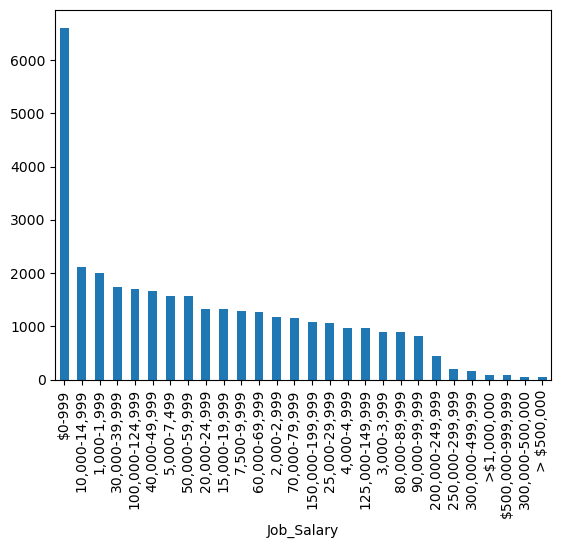

In [7]:
salary_counts = datacomb['Job_Salary'].value_counts()
salary_counts.plot(kind='bar')


In [8]:
def replace_text2(cell_value, replacements):
    if cell_value is not None and not pd.isna(cell_value):
        # Check if the cell_value is a float, and if so, convert it to a string.

        cell_value = str(cell_value)
        cell_value = replacements.get(cell_value,cell_value)
    return cell_value

In [9]:
salary_recat_dict = {
'$0-999': '$0 to $0.999K',
'1,000-1,999': '$1K to $9.999K',
'2,000-2,999': '$1K to $9.999K',
'3,000-3,999': '$1K to $9.999K',
'4,000-4,999': '$1K to $9.999K',
'5,000-7,499': '$1K to $9.999K',
'7,500-9,999': '$1K to $9.999K',
'10,000-14,999': '$10K to $49.999K',
'15,000-19,999': '$10K to $49.999K',
'20,000-24,999': '$10K to $49.999K',
'25,000-29,999': '$10K to $49.999K',
'30,000-39,999': '$10K to $49.999K',
'40,000-49,999': '$10K to $49.999K',
'50,000-59,999': '$50K to $79.999K',
'60,000-69,999': '$50K to $79.999K',
'70,000-79,999': '$50K to $79.999K',
'80,000-89,999': '$80K to $99.999K',
'90,000-99,999': '$80K to $99.999K',
'100,000-124,999': '$100K to $124.999K',
'125,000-149,999': '$125K to $149.999K',
'150,000-199,999': '$150K to $199.999K',
'200,000-249,999': '$200K to $299.999K',
'250,000-299,999': '$200K to $299.999K',
'300,000-499,999': '$300K to $500K',
'300,000-500,000': '$300K to $500K',
'$500,000-999,999': '>$500K',
'> $500,000': '>$500K',
'>$1,000,000': '>$1000K'}


In [10]:
datacomb['Job_Salary'].unique()

array([nan, '25,000-29,999', '100,000-124,999', '200,000-249,999',
       '150,000-199,999', '90,000-99,999', '30,000-39,999', '3,000-3,999',
       '50,000-59,999', '125,000-149,999', '15,000-19,999', '5,000-7,499',
       '10,000-14,999', '20,000-24,999', '$0-999', '7,500-9,999',
       '4,000-4,999', '80,000-89,999', '2,000-2,999', '250,000-299,999',
       '1,000-1,999', '$500,000-999,999', '70,000-79,999',
       '60,000-69,999', '40,000-49,999', '>$1,000,000', '300,000-499,999',
       '> $500,000', '300,000-500,000'], dtype=object)

In [11]:
datacomb['Job_Salary'] = datacomb['Job_Salary'].apply(replace_text2, replacements=salary_recat_dict)

In [12]:
datacomb['Job_Salary'].unique()

array([nan, '$10K to $49.999K', '$100K to $124.999K',
       '$200K to $299.999K', '$150K to $199.999K', '$80K to $99.999K',
       '$1K to $9.999K', '$50K to $79.999K', '$125K to $149.999K',
       '$0 to $0.999K', '>$500K', '>$1000K', '$300K to $500K'],
      dtype=object)

# Cleaning the 'Gender - Selected Choice' to replace non-man, non-women responses to NaN

In [13]:
Gender_dict = {'Prefer not to say': np.nan,
              'Nonbinary': np.nan,
              'Prefer to self-describe': np.nan}

In [14]:
datacomb['Gender - Selected Choice'] = datacomb['Gender - Selected Choice'].apply(replace_text2, replacements = Gender_dict)

In [15]:
datacomb.columns

Index(['Time spent on survey', 'Age', 'Gender - Selected Choice', 'Location',
       'Learning platforms tried - How well known are the platforms (platforms with good marketing) - Coursera',
       'Learning platforms tried - How well known are the platforms (platforms with good marketing) - edX',
       'Learning platforms tried - How well known are the platforms (platforms with good marketing) - Kaggle Learn Courses',
       'Learning platforms tried - How well known are the platforms (platforms with good marketing) - DataCamp',
       'Learning platforms tried - How well known are the platforms (platforms with good marketing) - Fast.ai',
       'Learning platforms tried - How well known are the platforms (platforms with good marketing) - Udacity',
       ...
       'Popular data product brands used (Databases, Warehouses, Lakes) - Amazon Athena',
       'Popular BI tool brands - Einstein Analytics',
       'Popular auto ML product brand - H20 Driverless AI',
       'Popular auto ML 

In [16]:
datacomb.shape

(70006, 278)

In [17]:
cat_datacomb_cols = datacomb.select_dtypes(include = ['object']).columns

In [18]:
len(cat_datacomb_cols)

264

# Drop 'Time spent on survey'

In [19]:
datacomb_new = datacomb.drop('Time spent on survey', axis = 1)
datacomb_new.head()

,Age,Gender - Selected Choice,Location,Learning platforms tried - How well known are the platforms (platforms with good marketing) - Coursera,Learning platforms tried - How well known are the platforms (platforms with good marketing) - edX,Learning platforms tried - How well known are the platforms (platforms with good marketing) - Kaggle Learn Courses,Learning platforms tried - How well known are the platforms (platforms with good marketing) - DataCamp,Learning platforms tried - How well known are the platforms (platforms with good marketing) - Fast.ai,Learning platforms tried - How well known are the platforms (platforms with good marketing) - Udacity,Learning platforms tried - How well known are the platforms (platforms with good marketing) - Udemy,Learning platforms tried - How well known are the platforms (platforms with good marketing) - LinkedIn Learning,"Learning platforms tried - How well known are the platforms (platforms with good marketing) - Cloud-certification programs (direct from AWS, Azure, GCP, or similar)",Learning platforms tried - How well known are the platforms (platforms with good marketing) - University Courses (resulting in a university degree),Learning platforms tried - How well known are the platforms (platforms with good marketing) - None,Learning platforms tried - How well known are the platforms (platforms with good marketing) - Other,Education level_attainedOrGGtoAttain,Coding Experience (in years),Popular programming language - Python,Popular programming language - R,Popular programming language - SQL,Popular programming language - C,Popular programming language - C#,Popular programming language - C++,Popular programming language - Java,Popular programming language - Javascript,Popular programming language - Bash,Popular programming language - PHP,Popular programming language - MATLAB,Popular programming language - Julia,Popular programming language - Go,Popular programming language - None,Popular programming language - Other,Popular IDEs - JupyterLab,Popular IDEs - RStudio,Popular IDEs - Visual Studio,Popular IDEs - Visual Studio Code (VSCode),Popular IDEs - PyCharm,Popular IDEs - Spyder,Popular IDEs - Notepad++,Popular IDEs - Sublime Text,Popular IDEs - Vim / Emacs,Popular IDEs - MATLAB,Popular IDEs - Jupyter Notebook,Popular IDEs - IntelliJ,Popular IDEs - None,Popular IDEs - Other,Popular hosted notebook products - Kaggle Notebooks,Popular hosted notebook products - Colab Notebooks,Popular hosted notebook products - Azure Notebooks,Popular hosted notebook products - Code Ocean,Popular hosted notebook products - IBM Watson Studio,Popular hosted notebook products - Amazon Sagemaker Studio,Popular hosted notebook products - Amazon Sagemaker Studio Lab,Popular hosted notebook products - Amazon EMR Notebooks,Popular hosted notebook products - Google Cloud Vertex AI Workbench,Popular hosted notebook products - Hex Workspaces,Popular hosted notebook products - Noteable Notebooks,Popular hosted notebook products - Databricks Collaborative Notebooks,Popular hosted notebook products - Deepnote Notebooks,Popular hosted notebook products - Gradient Notebooks,Popular hosted notebook products - None,Popular hosted notebook products - Other,Years in ML,Popular ML frameworks - Scikit-learn,Popular ML frameworks - TensorFlow,Popular ML frameworks - Keras,Popular ML frameworks - PyTorch,Popular ML frameworks - Fast.ai,Popular ML frameworks - Xgboost,Popular ML frameworks - LightGBM,Popular ML frameworks - CatBoost,Popular ML frameworks - Caret,Popular ML frameworks - Tidymodels,Popular ML frameworks - JAX,Popular ML frameworks - PyTorch Lightning,Popular ML frameworks - Huggingface,Popular ML frameworks - None,Popular ML frameworks - Other,Popular ML Algorithms - Linear or Logistic Regression,Popular ML Algorithms - Decision Trees or Random Forests,"Popular ML Algorithms - Gradient Boosting Machines (xgboost, lightgbm, etc)",Popular ML Algorithms - Bayesian Approaches,Popular ML Algorithms - Evolutionary Appr

# Cleaning the 'Location' column

In [20]:
datacomb_new['Location'].unique()

array(['India', 'Algeria', 'Egypt', 'France', 'Germany', 'Australia',
       'Other', 'South Korea', 'United States of America', 'Pakistan',
       'Mexico', 'Singapore', 'Italy', 'Taiwan', 'China', 'Argentina',
       'Turkey', 'Brazil', 'Nigeria', 'Chile', 'Japan', 'Canada',
       'Indonesia', 'Israel', 'Colombia', 'Russia',
       'United Kingdom of Great Britain and Northern Ireland', 'Ethiopia',
       'South Africa', 'Viet Nam', 'Kenya', 'Spain',
       'Iran, Islamic Republic of...', 'Cameroon', 'Tunisia', 'Peru',
       'Nepal', 'Morocco', 'Philippines', 'Ecuador', 'Thailand',
       'United Arab Emirates', 'Bangladesh', 'Netherlands', 'Zimbabwe',
       'Ghana', 'Portugal', 'Poland', 'Saudi Arabia', 'Romania',
       'Czech Republic', 'Malaysia', 'Sri Lanka', 'Hong Kong (S.A.R.)',
       'Ukraine', 'I do not wish to disclose my location', 'Belgium',
       'Ireland', 'Greece', 'Switzerland', 'Sweden', 'Austria', 'Belarus',
       'Denmark', 'Uganda', 'Kazakhstan', 'Iraq', 'No

In [21]:
Location_dict = {'I do not wish to disclose my location': np.nan,
              'Other': np.nan}

In [22]:
datacomb_new['Location'] = datacomb_new['Location'].apply(replace_text, replacements=Location_dict)

In [23]:
datacomb_new['Location'].unique()

array(['India', 'Algeria', 'Egypt', 'France', 'Germany', 'Australia', nan,
       'South Korea', 'United States of America', 'Pakistan', 'Mexico',
       'Singapore', 'Italy', 'Taiwan', 'China', 'Argentina', 'Turkey',
       'Brazil', 'Nigeria', 'Chile', 'Japan', 'Canada', 'Indonesia',
       'Israel', 'Colombia', 'Russia',
       'United Kingdom of Great Britain and Northern Ireland', 'Ethiopia',
       'South Africa', 'Viet Nam', 'Kenya', 'Spain',
       'Iran, Islamic Republic of...', 'Cameroon', 'Tunisia', 'Peru',
       'Nepal', 'Morocco', 'Philippines', 'Ecuador', 'Thailand',
       'United Arab Emirates', 'Bangladesh', 'Netherlands', 'Zimbabwe',
       'Ghana', 'Portugal', 'Poland', 'Saudi Arabia', 'Romania',
       'Czech Republic', 'Malaysia', 'Sri Lanka', 'Hong Kong (S.A.R.)',
       'Ukraine', 'Belgium', 'Ireland', 'Greece', 'Switzerland', 'Sweden',
       'Austria', 'Belarus', 'Denmark', 'Uganda', 'Kazakhstan', 'Iraq',
       'Norway', 'Republic of Korea'], dtype=object)

In [24]:
datacomb_new['Location'].nunique()

67

# Modification of Job Title Categories

In [25]:
job_title_dict = {
    'Data Analyst (Business, Marketing, Financial, Quantitative, etc)': 'Data Analyst',
    'Product Manager': 'Product/Project/Program Manager',
    'Product/Project Manager': 'Product/Project/Program Manager',
    'Program/Project Manager':'Product/Project/Program Manager',
    'Machine Learning Engineer':'Machine Learning/ MLops Engineer'}

def replace_text(cell_value, replacements):
    if cell_value is not None and not pd.isna(cell_value):
        # Check if the cell_value is a float, and if so, convert it to a string.
        if isinstance(cell_value, float):
            cell_value = str(cell_value)
        cell_value = replacements.get(cell_value,cell_value)
    return cell_value

datacomb_new['Job_title - Selected Choice'] = datacomb_new['Job_title - Selected Choice'].apply(replace_text, replacements=job_title_dict)
datacomb_new['Job_title - Selected Choice'].unique()

array([nan, 'Data Scientist', 'Software Engineer', 'Research Scientist',
       'Other', 'Developer Advocate', 'Data Analyst', 'Data Engineer',
       'Currently not employed', 'Machine Learning/ MLops Engineer',
       'Engineer (non-software)', 'Teacher / professor', 'Statistician',
       'Manager (Program, Project, Operations, Executive-level, etc)',
       'Data Administrator', 'Data Architect',
       'Product/Project/Program Manager', 'Student', 'Business Analyst',
       'Developer Relations/Advocacy', 'DBA/Database Engineer'],
      dtype=object)

## Shifting the 'Job_title - Selected Choice' column to the last row

In [26]:
Job_title = datacomb_new.pop('Job_title - Selected Choice')
datacomb_new.insert(len(datacomb_new.columns), 'Job_title - Selected Choice', Job_title)

# Combining the columns `Popular IDEs - Visual Studio`, `Popular IDEs - Visual Studio Code (VSCode)`, `Popular IDEs - Visual Studio / Visual Studio Code` and `Popular IDEs - Click to write Choice 13`

In [27]:
len(datacomb_new.columns)

277

In [28]:
# Checking if all 4 columns (`Popular IDEs - Visual Studio`, `Popular IDEs - Visual Studio Code (VSCode)`, `Popular IDEs - Visual Studio / Visual Studio Code` and `Popular IDEs - Click to write Choice 13`) are None

mask_all_none = (datacomb_new['Popular IDEs - Visual Studio'].isna() | (datacomb_new['Popular IDEs - Visual Studio'] == 'None')) & (datacomb_new['Popular IDEs - Visual Studio Code (VSCode)'].isna() | (datacomb_new['Popular IDEs - Visual Studio Code (VSCode)'] == 'None')) & (datacomb_new['Popular IDEs - Visual Studio / Visual Studio Code'].isna() | (datacomb_new['Popular IDEs - Visual Studio / Visual Studio Code'] == 'None')) & (datacomb_new['Popular IDEs - Click to write Choice 13'].isna() | (datacomb_new['Popular IDEs - Click to write Choice 13'] == 'None'))

In [29]:
datacomb_new['Popular IDEs - Visual Studio/VSCode'] = datacomb_new.apply(lambda row: f"{row['Popular IDEs - Visual Studio']} {row['Popular IDEs - Visual Studio Code (VSCode)']} {row['Popular IDEs - Visual Studio / Visual Studio Code']} {row['Popular IDEs - Click to write Choice 13']}" if not mask_all_none.loc[row.name].any() else np.nan, axis=1)

In [30]:
datacomb_new = datacomb_new.drop(['Popular IDEs - Visual Studio', 'Popular IDEs - Visual Studio Code (VSCode)', 'Popular IDEs - Visual Studio / Visual Studio Code', 'Popular IDEs - Click to write Choice 13'], axis=1)

In [31]:
len(datacomb_new.columns)

274

In [32]:
datacomb_new['Popular IDEs - Visual Studio/VSCode'].count()

31608

In [33]:
# non_null_values = datacomb_new[datacomb_new['Popular IDEs - Visual Studio/VSCode'].notna()]['Popular IDEs - Visual Studio/VSCode']
# checking non-values

In [34]:
# change all non-NaN values in the column 'Popular IDEx - Visual Studio/VScode' into 'VSCode'
datacomb_new.loc[~datacomb_new['Popular IDEs - Visual Studio/VSCode'].isna(), 'Popular IDEs - Visual Studio/VSCode'] = 'VSCode'

In [35]:
datacomb_new['Popular IDEs - Visual Studio/VSCode'].count()

31608

# Combining the columns 'Popular IDEs - JupyterLab', 'Popular IDEs - Jupyter Notebook', 'Popular IDEs - Jupyter (JupyterLab, Jupyter Notebooks, etc)' ----------- (NEW)

In [36]:
# categorical_columns = datacomb_new.select_dtypes(include=['object']).columns.tolist()
# categorical_columns

In [37]:
# this code is for convenience, to print out the columns that has the string 'Popular IDE'
matching_columns = [col for col in datacomb_new.columns if 'Popular IDE' in col]

if matching_columns:
    print("Columns containing 'popular IDE':")
    for col in matching_columns:
        print(col)
else:
    print("No columns contain 'popular IDE'.")

Columns containing 'popular IDE':
Popular IDEs - JupyterLab
Popular IDEs - RStudio
Popular IDEs - PyCharm
Popular IDEs - Spyder
Popular IDEs - Notepad++
Popular IDEs - Sublime Text
Popular IDEs - Vim / Emacs
Popular IDEs - MATLAB
Popular IDEs - Jupyter Notebook
Popular IDEs - IntelliJ
Popular IDEs - None
Popular IDEs - Other
Popular IDEs - Jupyter (JupyterLab, Jupyter Notebooks, etc)
Popular IDEs - Visual Studio/VSCode


In [38]:
mask_all_none = (datacomb_new['Popular IDEs - JupyterLab'].isna() | (datacomb_new['Popular IDEs - JupyterLab'] == 'None')) & \
(datacomb_new['Popular IDEs - Jupyter Notebook'].isna() | (datacomb_new['Popular IDEs - Jupyter Notebook'] == 'None')) & \
(datacomb_new['Popular IDEs - Jupyter (JupyterLab, Jupyter Notebooks, etc)'].isna() | (datacomb_new['Popular IDEs - Jupyter (JupyterLab, Jupyter Notebooks, etc)'] == 'None'))

In [39]:
datacomb_new['Popular IDEs - Jupyter'] = datacomb_new.apply(lambda row: f"{row['Popular IDEs - JupyterLab']} {row['Popular IDEs - Jupyter Notebook']} {row['Popular IDEs - Jupyter (JupyterLab, Jupyter Notebooks, etc)']}" if not mask_all_none.loc[row.name].any() else np.nan, axis=1)

In [40]:
# dropping the original three columns
datacomb_new = datacomb_new.drop(['Popular IDEs - JupyterLab', 'Popular IDEs - Jupyter Notebook', 'Popular IDEs - Jupyter (JupyterLab, Jupyter Notebooks, etc)'], axis=1)

In [41]:
# change all non-NaN values in the column 'Popular IDEs - Jupyter' into 'Jupyter'

datacomb_new.loc[~datacomb_new['Popular IDEs - Jupyter'].isna(), 'Popular IDEs - Jupyter'] = 'Jupyter'

# Combining the categories '1-2 years' and '1-3 years' in column 'Coding Experience (in years)'

In [42]:
coding_exp_dict = {'1-2 years': '1-3 years'}

In [43]:
datacomb_new['Coding Experience (in years)'] = datacomb_new['Coding Experience (in years)'].apply(replace_text, replacements=coding_exp_dict)

In [44]:
# checking that the category '1-2 years' has been replaced
datacomb_new['Coding Experience (in years)'].unique()

array([nan, '1-3 years', '10-20 years', '5-10 years', '20+ years',
       '3-5 years', '< 1 years', 'I have never written code'],
      dtype=object)

In [45]:
datacomb_new[datacomb_new['Coding Experience (in years)'] == '1-2 years']['year'].unique() # check that the category '1-2 years' has been replaced

array([], dtype=int64)

In [46]:
datacomb_new.head(1)

,Age,Gender - Selected Choice,Location,Learning platforms tried - How well known are the platforms (platforms with good marketing) - Coursera,Learning platforms tried - How well known are the platforms (platforms with good marketing) - edX,Learning platforms tried - How well known are the platforms (platforms with good marketing) - Kaggle Learn Courses,Learning platforms tried - How well known are the platforms (platforms with good marketing) - DataCamp,Learning platforms tried - How well known are the platforms (platforms with good marketing) - Fast.ai,Learning platforms tried - How well known are the platforms (platforms with good marketing) - Udacity,Learning platforms tried - How well known are the platforms (platforms with good marketing) - Udemy,Learning platforms tried - How well known are the platforms (platforms with good marketing) - LinkedIn Learning,"Learning platforms tried - How well known are the platforms (platforms with good marketing) - Cloud-certification programs (direct from AWS, Azure, GCP, or similar)",Learning platforms tried - How well known are the platforms (platforms with good marketing) - University Courses (resulting in a university degree),Learning platforms tried - How well known are the platforms (platforms with good marketing) - None,Learning platforms tried - How well known are the platforms (platforms with good marketing) - Other,Education level_attainedOrGGtoAttain,Coding Experience (in years),Popular programming language - Python,Popular programming language - R,Popular programming language - SQL,Popular programming language - C,Popular programming language - C#,Popular programming language - C++,Popular programming language - Java,Popular programming language - Javascript,Popular programming language - Bash,Popular programming language - PHP,Popular programming language - MATLAB,Popular programming language - Julia,Popular programming language - Go,Popular programming language - None,Popular programming language - Other,Popular IDEs - RStudio,Popular IDEs - PyCharm,Popular IDEs - Spyder,Popular IDEs - Notepad++,Popular IDEs - Sublime Text,Popular IDEs - Vim / Emacs,Popular IDEs - MATLAB,Popular IDEs - IntelliJ,Popular IDEs - None,Popular IDEs - Other,Popular hosted notebook products - Kaggle Notebooks,Popular hosted notebook products - Colab Notebooks,Popular hosted notebook products - Azure Notebooks,Popular hosted notebook products - Code Ocean,Popular hosted notebook products - IBM Watson Studio,Popular hosted notebook products - Amazon Sagemaker Studio,Popular hosted notebook products - Amazon Sagemaker Studio Lab,Popular hosted notebook products - Amazon EMR Notebooks,Popular hosted notebook products - Google Cloud Vertex AI Workbench,Popular hosted notebook products - Hex Workspaces,Popular hosted notebook products - Noteable Notebooks,Popular hosted notebook products - Databricks Collaborative Notebooks,Popular hosted notebook products - Deepnote Notebooks,Popular hosted notebook products - Gradient Notebooks,Popular hosted notebook products - None,Popular hosted notebook products - Other,Years in ML,Popular ML frameworks - Scikit-learn,Popular ML frameworks - TensorFlow,Popular ML frameworks - Keras,Popular ML frameworks - PyTorch,Popular ML frameworks - Fast.ai,Popular ML frameworks - Xgboost,Popular ML frameworks - LightGBM,Popular ML frameworks - CatBoost,Popular ML frameworks - Caret,Popular ML frameworks - Tidymodels,Popular ML frameworks - JAX,Popular ML frameworks - PyTorch Lightning,Popular ML frameworks - Huggingface,Popular ML frameworks - None,Popular ML frameworks - Other,Popular ML Algorithms - Linear or Logistic Regression,Popular ML Algorithms - Decision Trees or Random Forests,"Popular ML Algorithms - Gradient Boosting Machines (xgboost, lightgbm, etc)",Popular ML Algorithms - Bayesian Approaches,Popular ML Algorithms - Evolutionary Approaches,"Popular ML Algorithms - Dense Neural Networks (MLPs, etc)",Popular ML Algorithms - Convolutional Neural Networks,Popular M

# Optional: to sort the dataframe according to column name

In [47]:
# datacomb_new = datacomb_new.sort_index(axis=1)
# datacomb_new.head(1)

# Exporting this edited datacomb_new to a new CSV for further EDA

In [48]:
datacomb_new.to_csv('data_allthreeyears_combined_new1_exported.csv', index=False)

# Optional: Getting the unique categories for each column

In [51]:
# unique_cat_for_ech_col = datacomb_new.apply(lambda col: list(col.unique()))
# dict(unique_cat_for_ech_col)

# Optional: Question theme to question mapping

In [52]:
# qmap_df = pd.read_excel("Question theme to question mapping.xlsx", sheet_name = 'Question_Mapping')
# qmap_dict = dict(qmap_df.to_numpy())
# qmap_dict

# (Add-on) Generate the question theme count for each question theme

In [49]:
multi_select_cols = set()

for col in datacomb.columns:
    if " - " in col:
        multi_select_qn = col.split(" - ")[0]
        multi_select_cols.add(multi_select_qn)

In [50]:
multi_select_cols

{'Gender',
 'Job_JobScope',
 'Job_title',
 'Learning platforms tried',
 'Popular BI tool brands',
 'Popular Cloud Computing Platform Brand',
 'Popular Cloud Computing Product Brand',
 'Popular Computer Vision Methods',
 'Popular IDEs',
 'Popular ML Algorithms',
 'Popular ML frameworks',
 'Popular ML product brand',
 'Popular NLP Methods',
 'Popular auto ML product brand',
 'Popular data product brands used (Databases, Warehouses, Lakes)',
 'Popular hosted notebook products',
 'Popular media sources for Data Science',
 'Popular programming language',
 'Popular tools to monitor ML/Experiments'}

In [68]:
qn_theme_ct = pd.DataFrame()

# List of question themes
question_themes = ['Learning platforms tried',
 'Popular BI tool brands',
 'Popular Cloud Computing Platform Brand',
 'Popular Cloud Computing Product Brand',
 'Popular Computer Vision Methods',
 'Popular IDEs',
 'Popular ML Algorithms',
 'Popular ML frameworks',
 'Popular ML product brand',
 'Popular NLP Methods',
 'Popular auto ML product brand',
 'Popular data product brands used (Databases, Warehouses, Lakes)',
 'Popular hosted notebook products',
 'Popular media sources for Data Science',
 'Popular programming language',
 'Popular tools to monitor ML/Experiments']

# Iterate over each question theme
for theme in question_themes:
    # Create a list of columns related to the current theme
    # theme_columns = [col for col in datacomb_new.columns if theme in col]
    theme_columns = [col for col in datacomb_new.columns if theme in col and 'none' not in col.lower() and 'others' not in col.lower()]

    # Convert non-NaN values to 1, and NaN values to 0
    boolean_values = datacomb_new[theme_columns].notna().astype(int)
    
    # Create a new count column for the current theme
    qn_theme_ct[f'{theme} count'] = boolean_values.sum(axis=1)


In [69]:
qn_theme_ct.head()

,Learning platforms tried count,Popular BI tool brands count,Popular Cloud Computing Platform Brand count,Popular Cloud Computing Product Brand count,Popular Computer Vision Methods count,Popular IDEs count,Popular ML Algorithms count,Popular ML frameworks count,Popular ML product brand count,Popular NLP Methods count,Popular auto ML product brand count,"Popular data product brands used (Databases, Warehouses, Lakes) count",Popular hosted notebook products count,Popular media sources for Data Science count,Popular programming language count,Popular tools to monitor ML/Experiments count
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,2,1,3,0,0,0,0,0,0,1,0
2,7,0,0,0,0,1,3,4,0,0,0,0,2,5,4,0
3,4,0,1,0,0,4,1,3,0,3,0,1,3,4,3,2
4,1,0,0,0,0,4,0,0,0,0,0,0,0,1,3,0
